In [1]:
# Import packages.
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import seaborn as sns
from sympy import symbols, Eq, solve
from sympy import Matrix

In [2]:
# Load the .mat file.
mat_contents=sio.loadmat('./singlerun_classicHebbian_ee_distributions.mat')

c = mat_contents['c'].squeeze()
dt = mat_contents['dt'].squeeze()
dtRate = mat_contents['dtRate'].squeeze()
eRateT_classic = mat_contents['eRateT'].squeeze()
iRateT_classic = mat_contents['iRateT'].squeeze()
eta_ee_classic = mat_contents['eta_ee_hard'].squeeze()
Ie_current_classic = np.mean(mat_contents['IeRec'],axis=0)
Ii_current_classic = np.mean(mat_contents['IiRec'],axis=0)
Ix_current_classic = np.mean(mat_contents['IxRec'],axis=0)
JRec_ee_classic = mat_contents['JRec_ee']
mean_J_ee_classic = np.mean(JRec_ee_classic,axis=0)
N = mat_contents['N'].squeeze()
reSim_classic = mat_contents['reSim']
riSim_classic = mat_contents['riSim']
T = mat_contents['T'].squeeze()
T1 = mat_contents['T1'].squeeze()
T2 = mat_contents['T2'].squeeze()
tauSTDP = mat_contents['tauSTDP'].squeeze()
Tburn = mat_contents['Tburn']
Tburn_raster = mat_contents['Tburn_raster'].squeeze() 
W = mat_contents['W']
winsize = mat_contents['winsize'].squeeze()
Wx = mat_contents['Wx']

time_axis = np.linspace(0,T/1000,len(JRec_ee_classic[0,:]))


# Load the .mat file.
mat_contents=sio.loadmat('./singlerun_hardHebbian_ee_distributions.mat')

eRateT_hard = mat_contents['eRateT'].squeeze()
iRateT_hard = mat_contents['iRateT'].squeeze()
eta_ee_hard = mat_contents['eta_ee_hard'].squeeze()
Ie_current_hard = np.mean(mat_contents['IeRec'],axis=0)
Ii_current_hard = np.mean(mat_contents['IiRec'],axis=0)
Ix_current_hard = np.mean(mat_contents['IxRec'],axis=0)
JRec_ee_hard = mat_contents['JRec_ee']
mean_J_ee_hard = np.mean(JRec_ee_hard,axis=0)
reSim_hard = mat_contents['reSim']
riSim_hard = mat_contents['riSim']
T_hard = mat_contents['T'].squeeze()
time_axis_hard = np.linspace(0,T_hard/1000,len(JRec_ee_hard[0,:])).squeeze()


# Load the .mat file.
mat_contents=sio.loadmat('./singlerun_softHebbian_ee_distributions.mat')

eRateT_soft = mat_contents['eRateT'].squeeze()
iRateT_soft = mat_contents['iRateT'].squeeze()
eta_ee_soft = mat_contents['eta_ee_soft'].squeeze()
Ie_current_soft = np.mean(mat_contents['IeRec'],axis=0)
Ii_current_soft = np.mean(mat_contents['IiRec'],axis=0)
Ix_current_soft = np.mean(mat_contents['IxRec'],axis=0)
JRec_ee_soft = mat_contents['JRec_ee']
mean_J_ee_soft = np.mean(JRec_ee_soft,axis=0)
reSim_soft = mat_contents['reSim']
riSim_soft = mat_contents['riSim']


In [3]:
# Some details of this simulation:
print('N =',N)
print('eta_ee_classic =',eta_ee_classic)
print('eta_ee_hard =',eta_ee_hard)
print('eta_ee_soft =',eta_ee_soft)
print('c =',c)

N = 5000
eta_ee_classic = 0.005
eta_ee_hard = 0.001
eta_ee_soft = 0.005
c = 0


In [106]:
# We want distributions of rates, covs, vars, corrs, weights, and a raster. 
# And plot of E,I,X currents

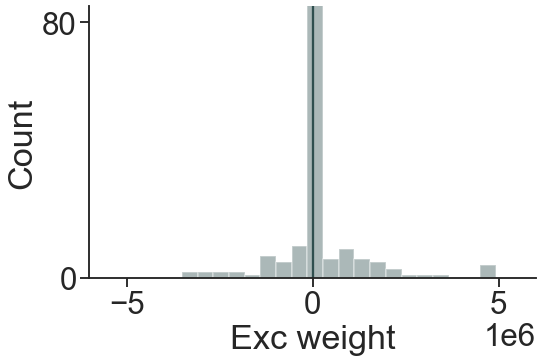

In [137]:
# Distribution of weights.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":2.3})

mean_each_synapse = np.mean(JRec_ee_classic[:,len(JRec_ee_classic[0,:])//2:len(JRec_ee_classic[0,:])//2+1] , axis=1)

sns.distplot(mean_each_synapse*np.sqrt(N),kde=False, color='darkslategray',bins=20)

plt.axvline(np.mean(JRec_ee_classic[:,-1]*np.sqrt(N)), color='darkslategray')

plt.xlabel('Exc weight')
plt.ylabel('Count')

plt.xlim((-6000000,6000000))
plt.ylim((0,85))

# plt.xticks((-200,-100,0))
plt.yticks((0,80))

plt.ticklabel_format(style='sci',scilimits=(-1,1),axis='x')

sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/Fig10-hebb-analysis/weights_dist_ee_classic.pdf", bbox_inches="tight")



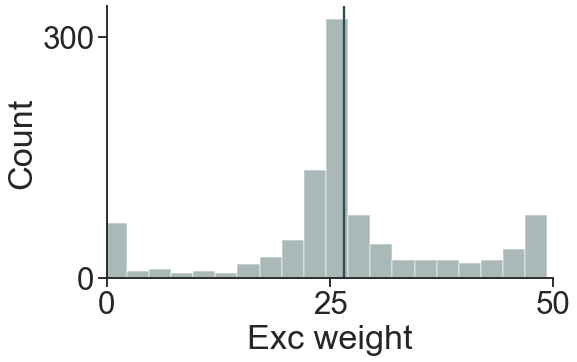

In [130]:
# Distribution of weights.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":2.3})

mean_each_synapse = np.mean(JRec_ee_hard[:,len(JRec_ee_hard[0,:])//2:len(JRec_ee_hard[0,:])] , axis=1)

sns.distplot(mean_each_synapse*np.sqrt(N),kde=False, color='darkslategray',bins=20)

plt.axvline(np.mean(JRec_ee_hard[:,-1]*np.sqrt(N)), color='darkslategray')

plt.xlabel('Exc weight')
plt.ylabel('Count')

plt.xlim((0,50))

plt.xticks((0,25,50))
plt.yticks((0,300))

sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/Fig10-hebb-analysis/weights_dist_ee_hard.pdf", bbox_inches="tight")


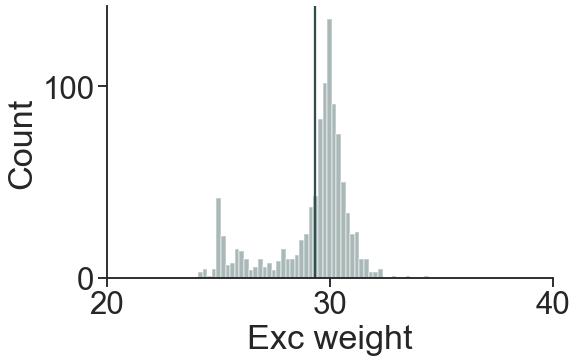

In [133]:
# Distribution of weights.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":2.3})

mean_each_synapse = np.mean(JRec_ee_soft[:,len(JRec_ee_soft[0,:])//2:len(JRec_ee_soft[0,:])] , axis=1)

sns.distplot(mean_each_synapse*np.sqrt(N),kde=False, color='darkslategray',bins=50)

plt.axvline(np.mean(JRec_ee_soft[:,-1]*np.sqrt(N)), color='darkslategray')

plt.xlabel('Exc weight')
plt.ylabel('Count')

plt.xlim((20,40))

plt.xticks((20,30,40))
plt.yticks((0,100))

sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/Fig10-hebb-analysis/weights_dist_ee_soft.pdf", bbox_inches="tight")




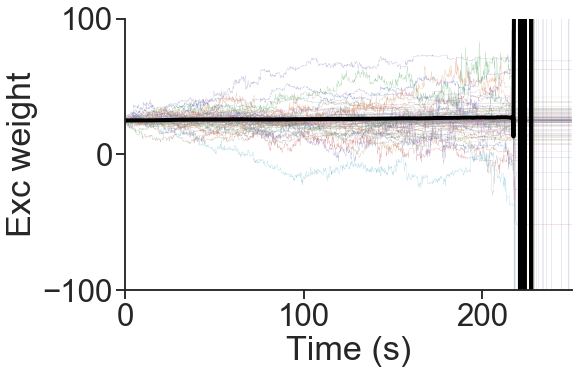

In [24]:
# Plot mean EI weight over time.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":0.15})

for i in range(100):
    plt.plot(time_axis,JRec_ee_classic[i,:]*np.sqrt(N))
# i=0
# plt.plot(time_axis,JRec_ei[i,:]*np.sqrt(N))

plt.plot(time_axis,mean_J_ee_classic*np.sqrt(N),color='black',linewidth=4,label='mean')

# plt.axhline(y=Jmax_ee_soft*np.sqrt(N),color='k')

plt.xlabel(r'Time (s)')
plt.ylabel(r'Exc weight')

plt.xlim((0,250))
plt.ylim(-100,100)

# plt.xticks((0,T/1000))
plt.yticks((-100,0,100))

# plt.ticklabel_format(style='sci',scilimits=(-1,1),axis='y')

sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/Fig10-hebb-analysis/weights_time_ee_classic.pdf", bbox_inches="tight")



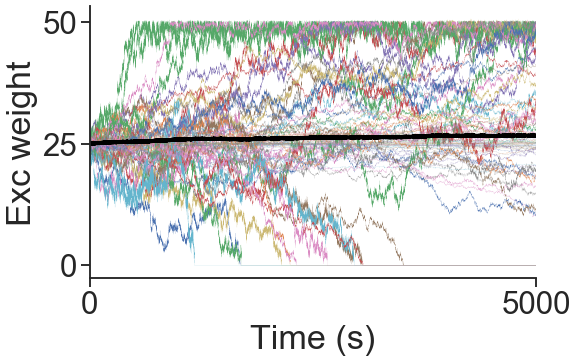

In [181]:
# Plot mean EI weight over time.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":0.1})

for i in range(100):
    plt.plot(time_axis_hard,JRec_ee_hard[i,:]*np.sqrt(N))
# i=0
# plt.plot(time_axis,JRec_ei[i,:]*np.sqrt(N))

plt.plot(time_axis_hard,mean_J_ee_hard*np.sqrt(N),color='black',linewidth=4,label='mean')

# plt.axhline(y=Jmax_ee_soft*np.sqrt(N),color='k')

plt.xlabel(r'Time (s)')
plt.ylabel(r'Exc weight')

plt.xlim((0,T_hard//1000))

plt.xticks((0,T_hard//1000))
plt.yticks((0,25,50))

sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/Fig10-hebb-analysis/weights_time_ee_hard.pdf", bbox_inches="tight")



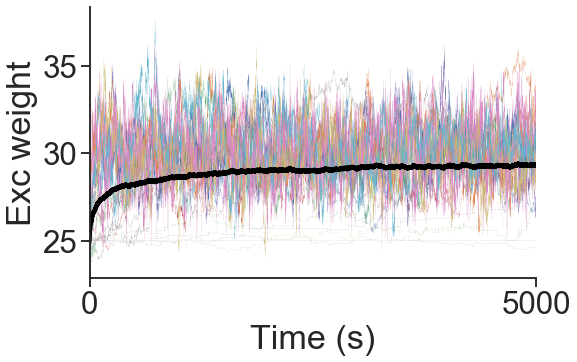

In [182]:
# Plot mean EI weight over time.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":0.1})

for i in range(20):
    plt.plot(time_axis_hard,JRec_ee_soft[i,:]*np.sqrt(N))
# i=0
# plt.plot(time_axis,JRec_ei[i,:]*np.sqrt(N))

plt.plot(time_axis_hard,mean_J_ee_soft*np.sqrt(N),color='black',linewidth=4,label='mean')

# plt.axhline(y=Jmax_ee_soft*np.sqrt(N),color='k')

plt.xlabel(r'Time (s)')
plt.ylabel(r'Exc weight')

plt.xlim((0,T_hard/1000))

plt.xticks((0,T_hard/1000))
# plt.yticks((-250,-150,-50))

sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/Fig10-hebb-analysis/weights_time_ee_soft.pdf", bbox_inches="tight")



0.0
0.2
0.4
0.6
0.8


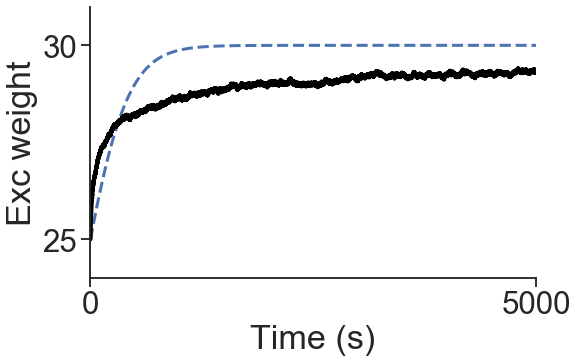

In [170]:
## Symbolic computation of the theoretical fixed point of the system for a set of different initial conditions.

pex = 0.1; qx = 0.2;  qi = 0.2; qe = 0.8; pix = 0.1;
pee = 0.1; pei = 0.1; pie = 0.1; pii = 0.1; jex = 180;
jix = 135; jei = -100; jie = 112.5; jii = -250; jee=25;
taux = 10; taue = 8; taui = 4; tauc = 5; rx = 10/1000; tauSTDP = 200;
wex = pex*qx*jex
wee = pee*qe*jee 
wix = pex*qi*jix 
wei = pei*qi*jei 
wie = pie*qe*jie 
wii = pii*qi*jii

W = np.array(([wee, wei], [wie, wii])).reshape((2,2))
Wx = np.array([wex, wix]).reshape((2,1))

time = 50000 # T/dt
j_ee = np.zeros((time,1))
j_ee[0,0] = 25

for t in range(time-1):
    wee = pee*qe*j_ee[t,0]
    W = np.array(([wee, wei], [wie, wii])).reshape((2,2))
    r = - np.linalg.inv(W) @ (Wx * rx)
    r_e = r[0,0]
    r_i = r[1,0]
    dj_ee =  - eta_ee_soft * ( tauSTDP * r_e**2 ) * ( j_ee[t] - 30 )
    j_ee[t+1] = j_ee[t] +  dj_ee
    if(t % (time/5) == 0):
        print(t/time)

        
# Plot mean input over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":.43})
        
plt.plot(np.linspace(0,T_hard/1000,len(j_ee)),j_ee,linewidth=3, linestyle='--')

plt.plot(time_axis_hard,mean_J_ee_soft*np.sqrt(N),color='black',linewidth=4,label='mean')


plt.ylim(24,31)
plt.xlim(-10,T_hard/1000)

plt.xticks((0,T_hard/1000))
plt.yticks((25,30))

plt.xlabel('Time (s)')
plt.ylabel('Exc weight')

sns.despine()

plt.show()

fig.savefig("./PlotsReview_BNs/Fig11-transient-dynamics/hebb_transient_weights.pdf", bbox_inches="tight")




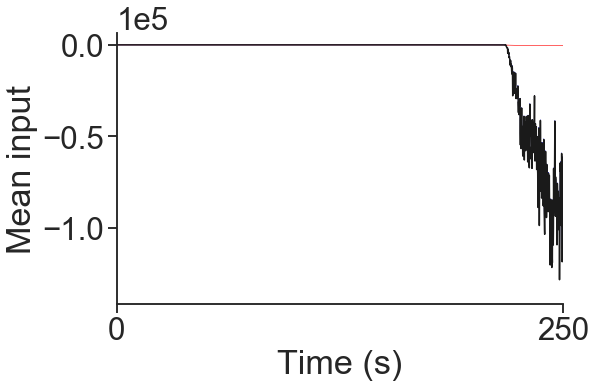

In [16]:
# Plot mean input over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":.6})

plt.plot(time_axis,Ie_current_classic+Ix_current_classic,color='blue')
plt.plot(time_axis,Ii_current_classic,color='red')
plt.plot(time_axis,Ie_current_classic+Ii_current_classic+Ix_current_classic,color='k',linewidth=1.5)
    
plt.xlabel(r'Time (s)')
plt.ylabel(r'Mean input')

# plt.ylim((-8,8))
plt.xlim((0,250))

plt.xticks((0,250))
# plt.yticks((-8,0,8))

plt.ticklabel_format(style='sci',scilimits=(-1,1),axis='y')


sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/Fig10-hebb-analysis/input_ee_classic.pdf", bbox_inches="tight")



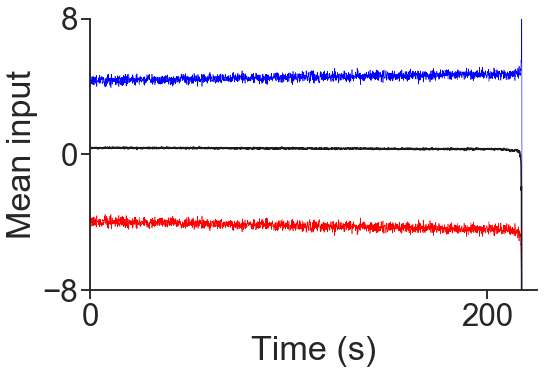

In [22]:
# Plot mean input over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":.6})

plt.plot(time_axis,Ie_current_classic+Ix_current_classic,color='blue')
plt.plot(time_axis,Ii_current_classic,color='red')
plt.plot(time_axis,Ie_current_classic+Ii_current_classic+Ix_current_classic,color='k',linewidth=1.5)
    
plt.xlabel(r'Time (s)')
plt.ylabel(r'Mean input')

plt.ylim((-8,8))
plt.xlim((0,225))

plt.xticks((0,200))
plt.yticks((-8,0,8))

plt.ticklabel_format(style='sci',scilimits=(-1,1),axis='y')


sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/Fig10-hebb-analysis/input_ee_classic_inset.pdf", bbox_inches="tight")



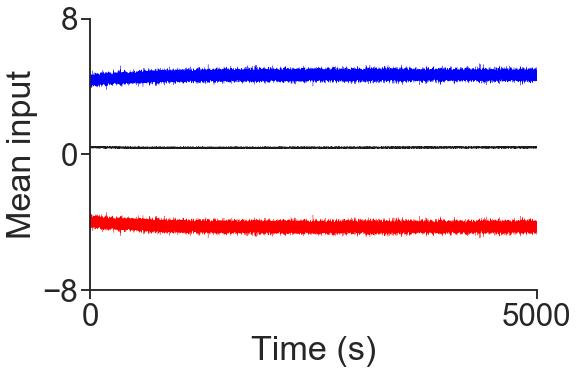

In [150]:
# Plot mean input over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":.3})

plt.plot(time_axis_hard,Ie_current_hard+Ix_current_hard,color='blue')
plt.plot(time_axis_hard,Ii_current_hard,color='red')
plt.plot(time_axis_hard,Ie_current_hard+Ii_current_hard+Ix_current_hard,color='k')
    
plt.xlabel(r'Time (s)')
plt.ylabel(r'Mean input')

plt.ylim((-8,8))
plt.xlim((0,T_hard/1000))

plt.xticks((0,T_hard/1000))
plt.yticks((-8,0,8))
sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/Fig10-hebb-analysis/input_ee_hard.pdf", bbox_inches="tight")


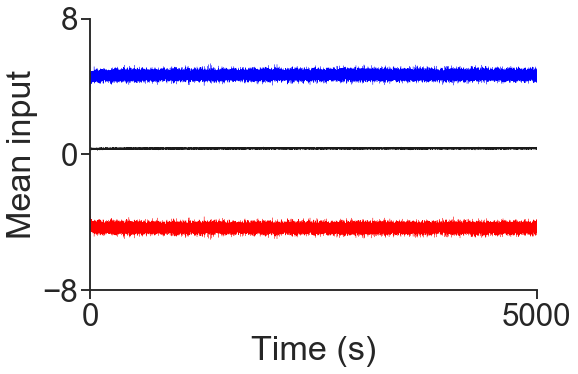

In [151]:
# Plot mean input over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":.3})

plt.plot(time_axis_hard,Ie_current_soft+Ix_current_soft,color='blue')
plt.plot(time_axis_hard,Ii_current_soft,color='red')
plt.plot(time_axis_hard,Ie_current_soft+Ii_current_soft+Ix_current_soft,color='k')
    
plt.xlabel(r'Time (s)')
plt.ylabel(r'Mean input')

plt.ylim((-8,8))
plt.xlim((0,T_hard/1000))

plt.xticks((0,T_hard/1000))
plt.yticks((-8,0,8))
sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/Fig10-hebb-analysis/input_ee_soft.pdf", bbox_inches="tight")



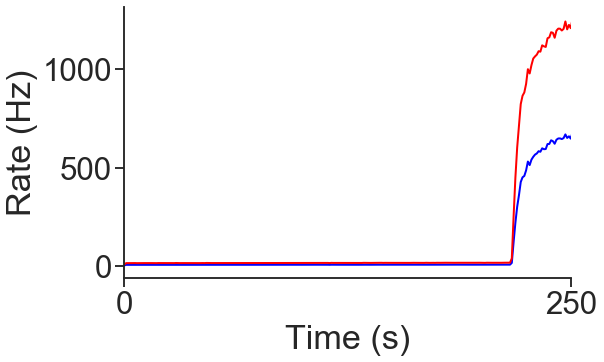

In [14]:
# Plot mean input over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":2})


plt.plot(1000*eRateT_classic,color='blue')
plt.plot(1000*iRateT_classic,color='red')

plt.xlabel(r'Time (s)')
plt.ylabel(r'Rate (Hz)')

plt.xticks((0,250))

plt.xlim((0,250))

sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/Fig10-hebb-analysis/rates_ee_classic.pdf", bbox_inches="tight")



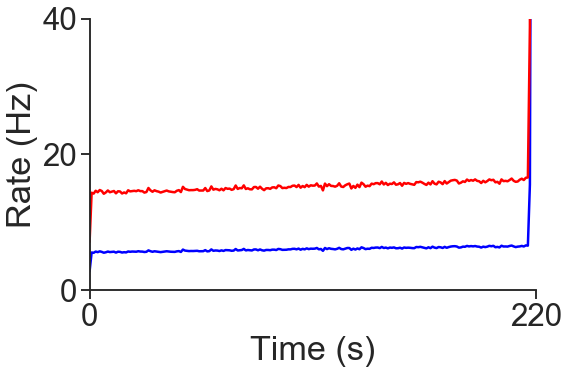

In [11]:
# Plot mean input over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":2.5})


plt.plot(1000*eRateT_classic,color='blue')
plt.plot(1000*iRateT_classic,color='red')

plt.xlabel(r'Time (s)')
plt.ylabel(r'Rate (Hz)')

plt.xticks((0,220))
plt.yticks((0,20,40))

plt.xlim((0,220))
plt.ylim((0,40))

sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/Fig10-hebb-analysis/rates_ee_classic_inset.pdf", bbox_inches="tight")



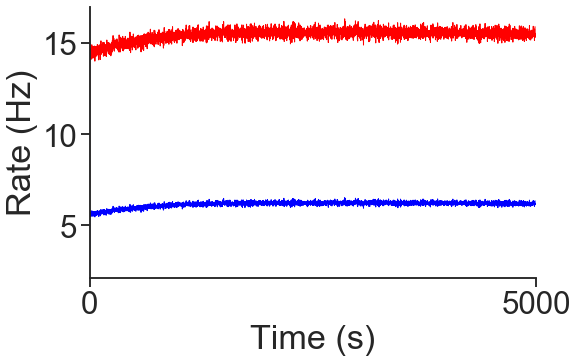

In [153]:
# Plot mean input over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":1.03})


plt.plot(1000*eRateT_hard[:-10],color='blue')
plt.plot(1000*iRateT_hard[:-10],color='red')

plt.xlabel(r'Time (s)')
plt.ylabel(r'Rate (Hz)')

plt.xticks((0,T_hard/1000))

plt.xlim((0,T_hard/1000))


sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/Fig10-hebb-analysis/rates_ee_hard.pdf", bbox_inches="tight")



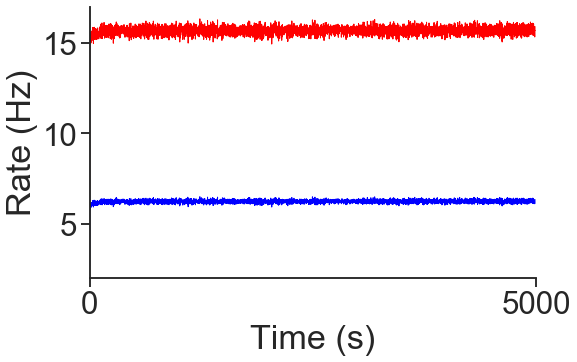

In [154]:
# Plot mean input over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":1.03})


plt.plot(1000*eRateT_soft[:-10],color='blue')
plt.plot(1000*iRateT_soft[:-10],color='red')

plt.xlabel(r'Time (s)')
plt.ylabel(r'Rate (Hz)')

plt.xticks((0,T_hard/1000))

plt.xlim((0,T_hard/1000))

sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/Fig10-hebb-analysis/rates_ee_soft.pdf", bbox_inches="tight")

